In [163]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import linear_model
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix, average_precision_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.utils import shuffle
from sklearn import preprocessing
import seaborn as sns
from sklearn.metrics import roc_auc_score, matthews_corrcoef, accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.model_selection import cross_val_score
from imblearn.over_sampling import SMOTE

import time
import regex as re
from collections import Counter
import warnings
warnings.filterwarnings('ignore')

In [250]:
train_df = pd.read_csv("input.csv") 
#tanish_df = pd.read_csv("Data/input_tanish.csv")

#mappings = {1: 0, 2: 1, 3:2}

#train_df.label = [mappings[item] for item in train_df.label]
train_df.columns = ['Unnamed: 0', 'patient_id', 'sequence', 'annotator_label']
train_df

,Unnamed: 0,patient_id,sequence,annotator_label
0,0,Z6759568,nnected to the doe and she does have some hear...,1
1,1,Z7871064,stent placement 71999 joint replacement pr kne...,1
2,2,Z11258802,a section 12 no id robert puopolo is a 60 yo m...,2
3,3,Z8920595,tory hypertension hyperlipidemia uti lower uri...,2
4,4,Z8842918,en has to be open for long periods of time she...,1
...,...,...,...,...
8651,8651,Z12003513,unspecified formulation 11182009 10262011 0116...,1
8652,8652,Z10932633,cribed for pain family history family history ...,1
8653,8653,Z6599245,n all day she goes up and down a staircase 25x...,1
8654,8654,Z11537887,n bwh ambulatory procedure ste service general...,1


In [251]:
X = train_df["sequence"]
y = train_df["annotator_label"]

y_label = y.to_numpy()
X_train_valid, X_test, y_train_valid, y_test = train_test_split(X,y,random_state=0,test_size=0.1, stratify=y_label)

y_train_valid_label = y_train_valid.to_numpy()
X_train, X_valid, y_train, y_valid = train_test_split(X_train_valid, y_train_valid, random_state=0, test_size=0.1, stratify=y_train_valid_label)

In [252]:
print(len(X_train))
print(len(X_test))
print(len(X_valid))

7011
866
779


In [253]:
print(X_train)

5975    ing comfortably extr warm and well perfused no...
4836    atus single spouse name na number of children ...
1692    14 family history problem relation age of onse...
7084    00 pack years 3000 types cigarettes last attem...
2079    visit with farouc a jaffer md phd allergies al...
                              ...                        
2382    bmi 250299 colon polyp health care maintenance...
2110    nd out patient was previously treated for syph...
443     g she is married and is a homemaker yesterday ...
5059    ne glycol glycolax 17 gram packet prednisone d...
7834    1 application topically 2 two times a day as n...
Name: sequence, Length: 7011, dtype: object


In [254]:
y_valid.value_counts()

1    421
0    219
2    139
Name: annotator_label, dtype: int64

In [255]:
# Initialize a CountVectorizer object: count_vectorizer
count_vectorizer = CountVectorizer(stop_words="english", analyzer='word', token_pattern=r'\b[A-Za-z0-9]+\b')

# Transform the training data using only the 'text' column values: count_train 
count_train = count_vectorizer.fit_transform(X_train)
count_test = count_vectorizer.transform(X_test)
count_valid = count_vectorizer.transform(X_valid)
#count_tanish = count_vectorizer.transform(tanish_df["sequence"].to_numpy())

# Create the CountVectorizer DataFrame: count_train
count_train = pd.DataFrame(count_train.A, columns=count_vectorizer.get_feature_names())

# Create the CountVectorizer DataFrame: test_df
count_test = pd.DataFrame(count_test.A, columns=count_vectorizer.get_feature_names())

count_valid = pd.DataFrame(count_valid.A, columns=count_vectorizer.get_feature_names())

#count_tanish = pd.DataFrame(count_tanish.A, columns=count_vectorizer.get_feature_names())

#count_tanish.head()
count_test.head()

,0,00,000,0000,000000,0001,000281732,0004,0005,00076000,...,zupon,zurek,zydis,zyl,zyloprim,zyprexa,zyrtec,zyrtecd,zytiga,zziness
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [258]:
# Initialize a TfidfVectorizer object: tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer(stop_words="english",analyzer='word', token_pattern=r'\b[A-Za-z0-9]+\b')
tfidf_train= tfidf_vectorizer.fit_transform(X_train)
tfidf_valid = tfidf_vectorizer.transform(X_valid)
tfidf_test = tfidf_vectorizer.transform(X_test)

# Create the TfidfVectorizer DataFrame: tfidf_df
tfidf_train = pd.DataFrame(tfidf_train.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_valid = pd.DataFrame(tfidf_valid.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_test = pd.DataFrame(tfidf_test.A, columns=tfidf_vectorizer.get_feature_names())
tfidf_valid.head()

,0,00,000,0000,000000,0001,000281732,0004,0005,00076000,...,zupon,zurek,zydis,zyl,zyloprim,zyprexa,zyrtec,zyrtecd,zytiga,zziness
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.206535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [259]:
tfidf_train_features_df = pd.concat([tfidf_train, y_train.reset_index(drop=True)], axis=1) #ONLY run once

In [260]:
tfidf_test_features_df = pd.concat([tfidf_test, y_test.reset_index(drop = True)], axis = 1)

In [261]:
tfidf_valid_features_df = pd.concat([tfidf_valid, y_valid.reset_index(drop = True)], axis = 1)

In [262]:
tfidf_train_features_df.shape

(7011, 31737)

In [266]:
tfidf_train_features_df_data = tfidf_train_features_df.values
X_smote, y_smote = tfidf_train_features_df_data[:, :-1], tfidf_train_features_df_data[:, -1]

tfidf_test_features_df_data = tfidf_test_features_df.values
X_smote_test, y_smote_test = tfidf_test_features_df_data[:, :-1], tfidf_test_features_df_data[:, -1]

tfidf_valid_features_df_data = tfidf_valid_features_df.values
X_smote_valid, y_smote_valid = tfidf_valid_features_df_data[:, :-1], tfidf_valid_features_df_data[:, -1]

In [267]:
#X_smote_test, y_smote_test = 
oversample = SMOTE(k_neighbors = 1000)
X_train_new, y_train_new = oversample.fit_resample(X_smote, y_smote)

counter = Counter(y_train_new)
print("Train Data after SMOTE")
for k,v in counter.items():
    print('Class=%d, n=%d' % (k, v))

Train Data after SMOTE
Class=0, n=3793
Class=1, n=3793
Class=2, n=3793


In [268]:
oversample2 = SMOTE(k_neighbors = 150)
X_test_new, y_test_new = oversample2.fit_resample(X_smote_test, y_smote_test)
counter2 = Counter(y_test_new)
print("Test Data after SMOTE")
for k,v in counter2.items():
    print('Class=%d, n=%d' % (k, v))

Test Data after SMOTE
Class=1, n=469
Class=2, n=469
Class=0, n=469


In [269]:
oversample3 = SMOTE(k_neighbors = 130)
X_valid_new, y_valid_new = oversample3.fit_resample(X_smote_valid, y_smote_valid)
counter3 = Counter(y_valid_new)
print("Test Data after SMOTE")
for k,v in counter3.items():
    print('Class=%d, n=%d' % (k, v))

Test Data after SMOTE
Class=1, n=421
Class=2, n=421
Class=0, n=421


In [270]:
X_train_new = pd.DataFrame(X_train_new)
y_train_new = pd.Series(y_train_new)

X_test_new = pd.DataFrame(X_test_new)
y_test_new = pd.Series(y_test_new)

X_valid_new = pd.DataFrame(X_valid_new)
y_valid_new = pd.Series(y_valid_new)

In [271]:
tfidf_train_features_df_new = pd.concat([X_train_new, y_train_new.reset_index(drop=True)], axis=1)
tfidf_train_features_df_new.columns = tfidf_train_features_df.columns

tfidf_test_features_df_new = pd.concat([X_test_new, y_test_new.reset_index(drop=True)], axis=1)
tfidf_test_features_df_new.columns = tfidf_test_features_df.columns

tfidf_valid_features_df_new = pd.concat([X_valid_new, y_valid_new.reset_index(drop=True)], axis=1)
tfidf_valid_features_df_new.columns = tfidf_valid_features_df.columns

In [272]:
mappings = {0.0 : 0, 1.0 : 1, 2.0 : 2}

tfidf_train_features_df_new.annotator_label = [mappings[item] for item in tfidf_train_features_df_new.annotator_label]
tfidf_test_features_df_new.annotator_label = [mappings[item] for item in tfidf_test_features_df_new.annotator_label]
tfidf_valid_features_df_new.annotator_label = [mappings[item] for item in tfidf_valid_features_df_new.annotator_label]

# tfidf_train_features_df_new.to_csv("Data/SMOTE_train.csv")
# tfidf_test_features_df_new.to_csv("Data/SMOTE_test.csv")
# tfidf_valid_features_df_new.to_csv("Data/SMOTE_val.csv")

tfidf_features_master = pd.concat([tfidf_train_features_df_new,tfidf_test_features_df_new,tfidf_valid_features_df_new])

tfidf_features_master.head()

,0,00,000,0000,000000,0001,000281732,0004,0005,00076000,...,zurek,zydis,zyl,zyloprim,zyprexa,zyrtec,zyrtecd,zytiga,zziness,annotator_label
0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
3,0.000000,0.259337,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1259,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1260,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
1261,0.034714,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2


In [273]:
tfidf_train_features_df_new.drop(columns = 'annotator_label')
tfidf_test_features_df_new.drop(columns = 'annotator_label')
tfidf_valid_features_df_new.drop(columns = 'annotator_label')

,0,00,000,0000,000000,0001,000281732,0004,0005,00076000,...,zupon,zurek,zydis,zyl,zyloprim,zyprexa,zyrtec,zyrtecd,zytiga,zziness
0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.206535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1258,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1259,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1260,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1261,0.034714,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [274]:
def filter_features_by_cor(df):
    m = len(df.columns)
    output = df.iloc[:,m-1] 
    output_list = output.tolist()
    corrcoef_array = []

    for i in range(0,m-2):
        input_list = df.iloc[:,i].tolist()
        cols = [input_list, output_list]
        corrcoef = abs(np.corrcoef(cols)) 
        #print(type(corrcoef))
        corrcoef_array = np.append(corrcoef_array,corrcoef[0,1])

    feature_names = list(df)
    feature_names = feature_names[0:m-2]
    output_df = pd.DataFrame(feature_names, columns=['Features'])
    output_df['CorrCoef'] = corrcoef_array
    output_df = output_df.sort_values('CorrCoef')
    output_df = output_df.reset_index()
    output_df = output_df.drop(columns = "index")
    
    return output_df

In [275]:
tfidf_output_df = filter_features_by_cor(tfidf_train_features_df_new)
tfidf_output_df = tfidf_output_df.sort_values(by=['CorrCoef'],ascending = False)
#tfidf_output_df.to_csv('Data/tfidf_vector_feature_corr.csv')

tfidf_output_df

,Features,CorrCoef
31734,intact,0.589761
31733,oriented,0.471885
31732,attentionconcentration,0.448340
31731,judgment,0.423166
31730,fund,0.422695
...,...,...
28,applicab,0.000000
27,texas,0.000000
26,proof,0.000000
25,acezinccopper,0.000000


In [276]:
# Setting Correlation threshold
top_tfidf_features_df = tfidf_output_df[:500]
filtered_tfidf_train = tfidf_train_features_df_new.filter(items=top_tfidf_features_df['Features'])
filtered_tfidf_test = tfidf_test_features_df_new.filter(items=top_tfidf_features_df['Features'])
filtered_tfidf_valid   = tfidf_valid_features_df_new.filter(items=top_tfidf_features_df['Features'])
#filtered_tfidf_tanish = tfidf_tanish.filter(items = top_tfidf_features_df['Features'])

In [277]:
filtered_tfidf_train.to_csv(r"C:\Users\MIND_DS\Dropbox (Partners HealthCare)\NLP\Tanish\APOE-SLAT\Modeling\Data\tfidf_train_smote.csv", index = False)
filtered_tfidf_test.to_csv(r"C:\Users\MIND_DS\Dropbox (Partners HealthCare)\NLP\Tanish\APOE-SLAT\Modeling\Data\tfidf_test_smote.csv", index = False)
filtered_tfidf_valid.to_csv(r"C:\Users\MIND_DS\Dropbox (Partners HealthCare)\NLP\Tanish\APOE-SLAT\Modeling\Data\tfidf_validation_smote.csv", index = False)

In [278]:
y_train.to_csv(r"C:\Users\MIND_DS\Dropbox (Partners HealthCare)\NLP\Tanish\APOE-SLAT\Modeling\Data\y_train_smote.csv", index = False)
y_test.to_csv(r"C:\Users\MIND_DS\Dropbox (Partners HealthCare)\NLP\Tanish\APOE-SLAT\Modeling\Data\y_test_smote.csv", index = False)
y_valid.to_csv(r"C:\Users\MIND_DS\Dropbox (Partners HealthCare)\NLP\Tanish\APOE-SLAT\Modeling\Data\y_validation_smote.csv", index = False)

In [288]:
print("LR Performance on Test Set:")
print("---------------------------------------------------------------------\n")

for c in [0.01, 0.1, 1, 10, 100]:
    lr = LogisticRegression(C = c, random_state = 42)
    lr.fit(filtered_tfidf_train, y_train_new)

    y_prob_lr = lr.predict_proba(filtered_tfidf_test)
    labels_lgr_tfidf = lr.predict(filtered_tfidf_test)

    target_names = ['NO', 'NTR', 'YES']

    results_lgr = classification_report(y_test_new, labels_lgr_tfidf, target_names=target_names, output_dict=True)
    results_lgr = pd.DataFrame(results_lgr).transpose()

    print("\nC: ", c, "\n", results_lgr)
    print("\nAUC: ", roc_auc_score(y_test_new, y_prob_lr, multi_class='ovr'))
    print("ACC: ", accuracy_score(y_test_new, labels_lgr_tfidf))
    #print("MCC: ", matthews_corrcoef(y_valid, y_prob_lr))
    print("\nConfusion Matrix: \n", confusion_matrix(y_test_new, labels_lgr_tfidf))
    print("---------------------------------------------------------------------\n")

LR Performance on Test Set: 
---------------------------------------------------------------------


C:  0.01 
               precision    recall  f1-score     support
NO             0.952381  0.767591  0.850059   469.00000
NTR            0.742268  0.921109  0.822074   469.00000
YES            0.885906  0.844350  0.864629   469.00000
accuracy       0.844350  0.844350  0.844350     0.84435
macro avg      0.860185  0.844350  0.845587  1407.00000
weighted avg   0.860185  0.844350  0.845587  1407.00000

AUC:  0.9514345724923964
ACC:  0.8443496801705757

Confusion Matrix: 
 [[360  86  23]
 [  9 432  28]
 [  9  64 396]]
---------------------------------------------------------------------


C:  0.1 
               precision    recall  f1-score      support
NO             0.946970  0.799574  0.867052   469.000000
NTR            0.781193  0.921109  0.845401   469.000000
YES            0.888646  0.867804  0.878101   469.000000
accuracy       0.862829  0.862829  0.862829     0.862829
macro avg  

500
500


<BarContainer object of 20 artists>

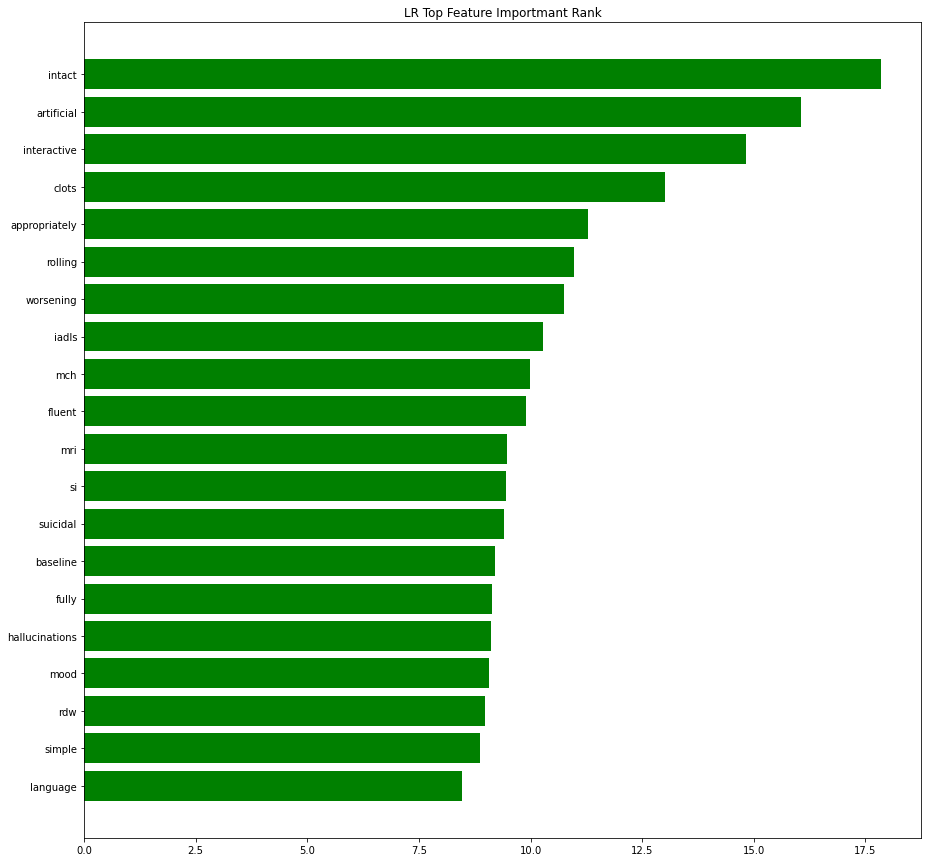

In [299]:
show_number = 20
lr_feature_names = list(filtered_tfidf_train.columns)
print(len(lr_feature_names))
lr_feature_coef = list(lr.coef_.tolist()[0])
print(len(lr_feature_coef))
lr_feature_importance_df = pd.DataFrame(list(zip(lr_feature_names,lr_feature_coef)), columns = ['feature','lr_coef'])
lr_feature_importance_df = lr_feature_importance_df.sort_values('lr_coef',ascending=False)

plt.figure(figsize=(15,15))
plt.title("LR Top Feature Importmant Rank")
plt.gca().invert_yaxis()
plt.barh(lr_feature_importance_df[:show_number]['feature'], lr_feature_importance_df[:show_number]['lr_coef'], color='g')